# Spotify Top Songs 2023

In [1]:
import kaggle
import zipfile
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [3]:
api = KaggleApi()
api.authenticate()

In [4]:
!kaggle datasets download -d nelgiriyewithana/top-spotify-songs-2023

top-spotify-songs-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


## Inspecting/Cleaning the data

In [5]:
zipfile_name = 'top-spotify-songs-2023.zip'
with zipfile.ZipFile(zipfile_name, 'r') as file:
    file.extractall()

In [6]:
df = pd.read_csv('spotify-2023.csv', encoding = 'latin-1')

In [7]:
df.head(5)

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [8]:
df.shape

(953, 24)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [10]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Looking at the datatypes to see if anything is off... and I can immediately see: streams, in_deezer_playlists, in_shazam_charts are listed as objects when they should be numeric

In [11]:
df[['track_name','artist(s)_name','streams']].sort_values(by='streams', ascending=False)

,track_name,artist(s)_name,streams
574,Love Grows (Where My Rosemary Goes),Edison Lighthouse,BPM110KeyAModeMajorDanceability53Valence75Ener...
33,Anti-Hero,Taylor Swift,999748277
625,Arcade,Duncan Laurence,991336132
253,Glimpse of Us,Joji,988515741
455,Seek & Destroy,SZA,98709329
...,...,...,...
366,Revenge,XXXTENTACION,1022258230
744,Right On,Lil Baby,101780047
515,Best Friends,The Weeknd,101114984
500,ýýýabcdefu,Gayle,1007612429


Love Grows (Where My Rosemary Goes) by Edison Lighthouse seems to be the only source of the mistake, so I'm getting rid of it

In [12]:
df = df.drop(index=574,axis=0)

In [13]:
df[['track_name','artist(s)_name','streams']].sort_values(by='streams', ascending=False)

,track_name,artist(s)_name,streams
33,Anti-Hero,Taylor Swift,999748277
625,Arcade,Duncan Laurence,991336132
253,Glimpse of Us,Joji,988515741
455,Seek & Destroy,SZA,98709329
98,Summertime Sadness,Lana Del Rey,983637508
...,...,...,...
366,Revenge,XXXTENTACION,1022258230
744,Right On,Lil Baby,101780047
515,Best Friends,The Weeknd,101114984
500,ýýýabcdefu,Gayle,1007612429


In [14]:
df['streams'] = df['streams'].astype('int64')

In [15]:
df[['track_name','artist(s)_name','streams']].sort_values(by='streams', ascending=False)

,track_name,artist(s)_name,streams
55,Blinding Lights,The Weeknd,3703895074
179,Shape of You,Ed Sheeran,3562543890
86,Someone You Loved,Lewis Capaldi,2887241814
620,Dance Monkey,Tones and I,2864791672
41,Sunflower - Spider-Man: Into the Spider-Verse,"Post Malone, Swae Lee",2808096550
...,...,...,...
68,Overdrive,Post Malone,14780425
142,"Gol Bolinha, Gol Quadrado 2","Mc Pedrinho, DJ 900",11956641
144,QUEMA,"Sog, Ryan Castro, Peso Pluma",11599388
393,Jhoome Jo Pathaan,"Arijit Singh, Vishal Dadlani, Sukriti Kakar, V...",1365184


This new list of streams looks much better now, although that last row 'Que Vuelvas' by Carin Leon, Grupo Frontera, looks odd... so I'm just getting rid of it

In [16]:
df = df.drop(index=123,axis=0)

Looking through the csv file, I saw that the in_deezer_playlists and in_shazam_charts columns contained commas, which is what made them stored as objects instead of numbers, so I'm getting rid of the commas, then converting the dtypes

In [17]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].replace(',','',regex=True)

In [18]:
df['in_deezer_playlists'] = df['in_deezer_playlists'].astype('int64')

In [19]:
df[['in_deezer_playlists']].sort_values(by='in_deezer_playlists', ascending=False)

,in_deezer_playlists
624,12367
757,8215
910,7827
331,7341
179,6808
...,...
355,0
703,0
327,0
914,0


In [20]:
df['in_shazam_charts'] = df['in_shazam_charts'].replace(',','',regex=True)

The in_shazam_charts column also contains null values. Replacing those with 0.

In [21]:
df['in_shazam_charts'] = df['in_shazam_charts'].fillna(0)

In [22]:
df['in_shazam_charts'] = df['in_shazam_charts'].astype('int64')

In [23]:
df[['in_shazam_charts']].sort_values(by='in_shazam_charts', ascending=False)

,in_shazam_charts
88,1451
13,1281
17,1173
89,1170
44,1133
...,...
517,0
515,0
514,0
513,0


Checking the data types to see if the changes went into effect properly

In [24]:
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                  int64
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists      int64
in_deezer_charts         int64
in_shazam_charts         int64
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

Checking for any null values left in the dataframe (probably should've done this sooner)

In [25]:
df.isna().sum()

track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts         0
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64

95 missing values for song key... I could look this up for each song and enter the key myself... but no way I'm doing that

This info isn't crucial so I'm ok with ignoring these nulls

## Visualization

### Streams, Songs, and Artists

Finding the top 10 most streamed songs

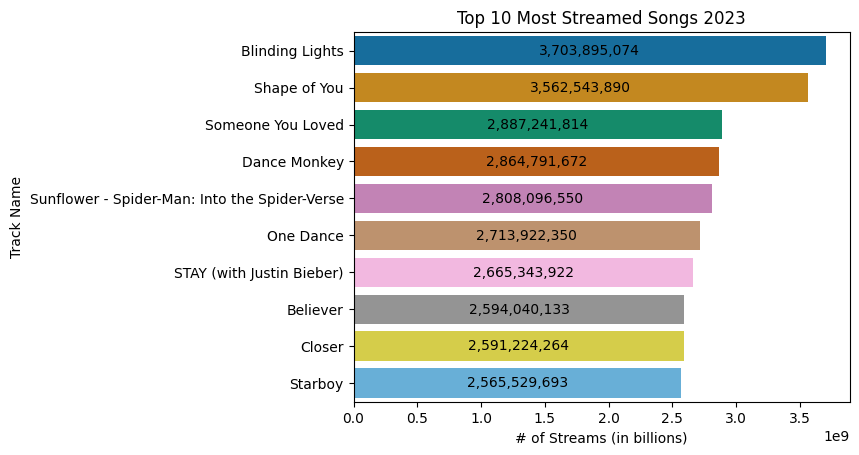

In [26]:
top_10_songs = df[['track_name', 'streams']].sort_values(by='streams', ascending=False).head(10)
ax = sns.barplot(x='streams',y='track_name',data=top_10_songs, palette='colorblind', hue='track_name')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.0f}', label_type='center')
plt.title('Top 10 Most Streamed Songs 2023')
plt.xlabel('# of Streams (in billions)')
plt.ylabel('Track Name')
plt.show()

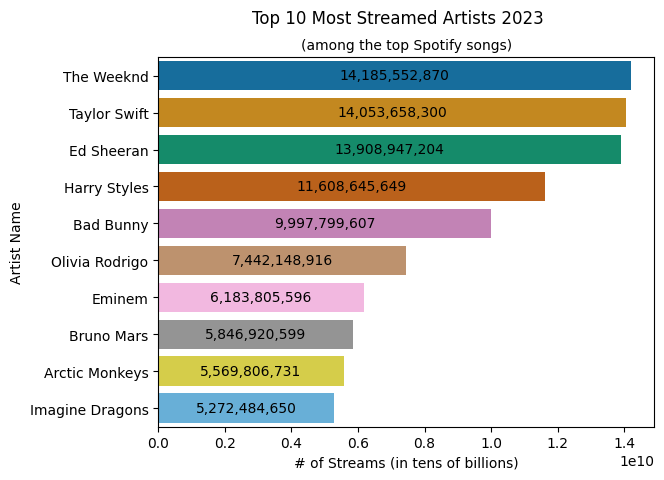

In [27]:
artist_stream_count = df[['artist(s)_name','streams']].groupby(['artist(s)_name'], as_index=False)['streams'].sum().sort_values(by='streams',ascending=False).head(10)
ax = sns.barplot(x='streams', y='artist(s)_name', data=artist_stream_count, palette='colorblind', hue='artist(s)_name')
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.0f}', label_type='center')
plt.suptitle('Top 10 Most Streamed Artists 2023')
plt.title('(among the top Spotify songs)', fontsize=10)
plt.xlabel('# of Streams (in tens of billions)')
plt.ylabel('Artist Name')
plt.show()

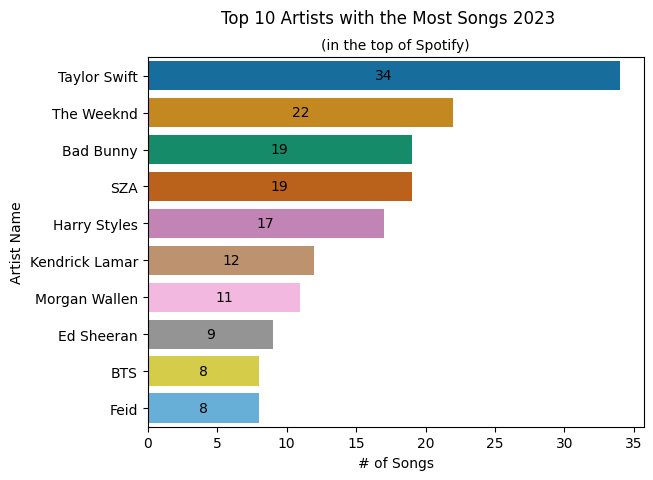

In [28]:
artist_song_count = df['artist(s)_name'].value_counts().head(10)
ax = sns.barplot(x=artist_song_count.values, y=artist_song_count.index, palette='colorblind', hue=artist_song_count.index)
for bars in ax.containers:
    ax.bar_label(bars, fmt='{:,.0f}', label_type='center')
plt.xlabel('# of Songs')
plt.ylabel('Artist Name')
plt.suptitle('Top 10 Artists with the Most Songs 2023')
plt.title('(in the top of Spotify)', fontsize=10)
plt.show()

- Taylor Swift's dominance makes sense in 2023, given her massive tour AND movie that's literally just a recording of her concert 

- Despite Taylor Swift having 12 more songs at the top of Spotify than the next artist, The Weeknd still managed to just barely pass her in total streams

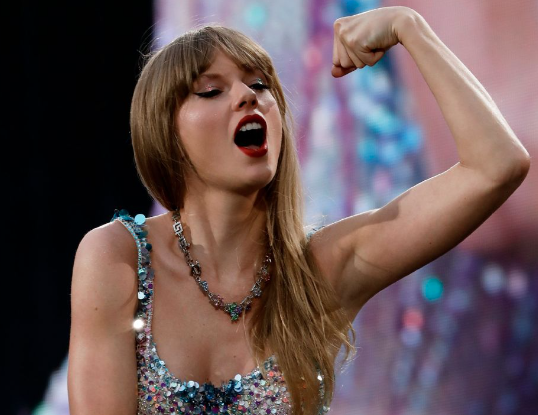 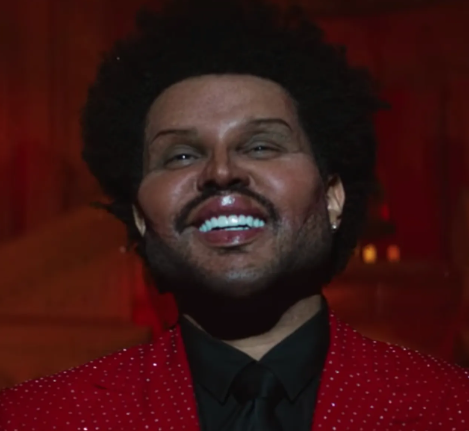

### Keys and Modes

Let's take a look at the frequency of each Key used

In [29]:
#function to sort df by # of streams desc, with parameter to filter the # of songs, returning the # of times each key is used
def keys(num):
    top_song_key = df[['track_name', 'streams','key']].sort_values(by='streams', ascending=False).head(num)
    key_count = top_song_key['key'].value_counts()
    return key_count
keys(-1)

key
C#    120
G      95
G#     91
F      89
D      81
B      81
A      74
F#     73
E      62
A#     56
D#     33
Name: count, dtype: int64

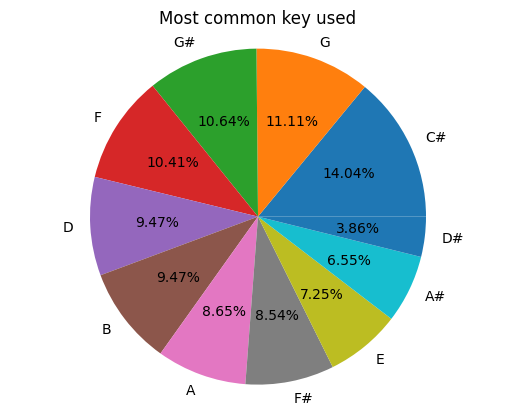

In [30]:
plt.pie(keys(-1).values, labels=keys(-1).index, autopct='%1.2f%%')
plt.title('Most common key used')
plt.axis('equal')
plt.show()

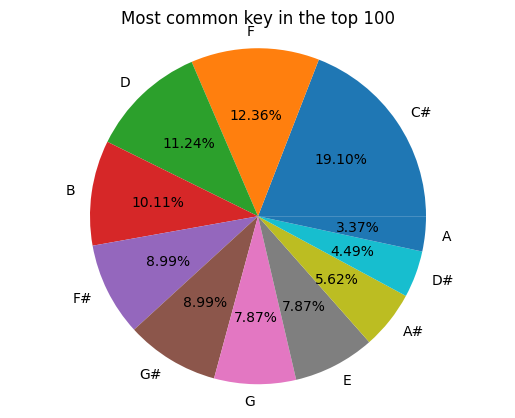

In [31]:
plt.pie(keys(100).values, labels=keys(100).index, autopct='%1.2f%%')
plt.title('Most common key in the top 100')
plt.axis('equal')
plt.show()

In [59]:
keys(10)

key
C#    5
F#    1
D     1
A#    1
G#    1
G     1
Name: count, dtype: int64

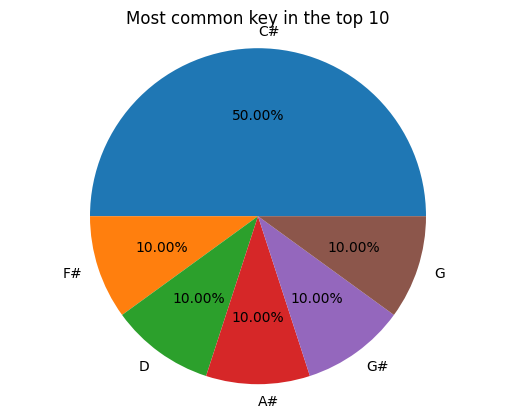

In [32]:
plt.pie(keys(10).values, labels=keys(10).index, autopct='%1.2f%%')
plt.title('Most common key in the top 10')
plt.axis('equal')
plt.show()

C# is the most common key across the whole dataset, the top 100 and the top 10... C# accounts for half of the top 10 songs!

Now I'm going to take a look at the total major vs minor songs:

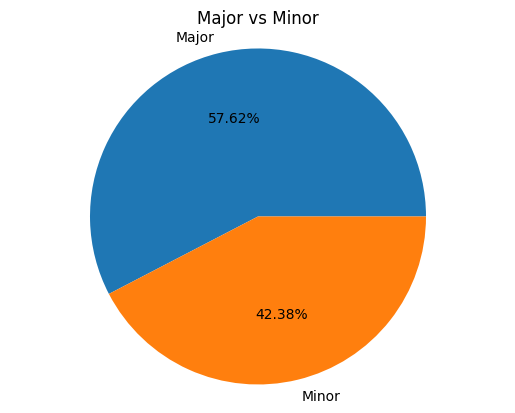

In [33]:
mode_count = df['mode'].value_counts()
plt.pie(mode_count.values, labels=mode_count.index, autopct='%1.2f%%')
plt.title('Major vs Minor')
plt.axis('equal')
plt.show()

There are more songs in a major key, and since we just saw that C# is the most popular key, let's see whether C# major or C# minor is more common.

In [34]:
#function to sort songs by # of streams desc, but this time filtering the data further by only showing the songs in C#,
#then returning how many of those songs are in C# major or C# minor
def mode_C(num):
    top_song_key = df[['track_name', 'streams', 'key', 'mode']].sort_values(by='streams', ascending=False).head(num)
    top_song_C = top_song_key[top_song_key['key'] == 'C#']
    mode_count_C = top_song_C['mode'].value_counts()
    return mode_count_C
mode_C(-1)

mode
Major    73
Minor    47
Name: count, dtype: int64

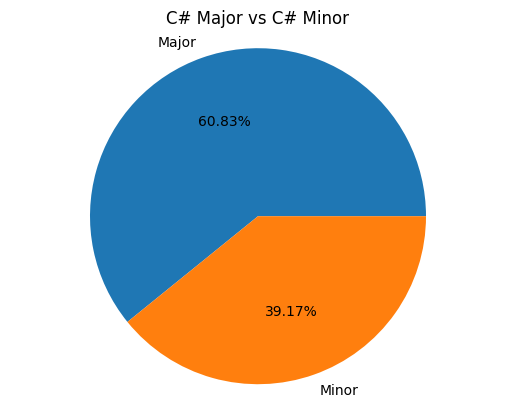

In [35]:
plt.pie(mode_C(-1).values, labels=mode_C(-1).index, autopct='%1.2f%%')
plt.title('C# Major vs C# Minor')
plt.axis('equal')
plt.show()

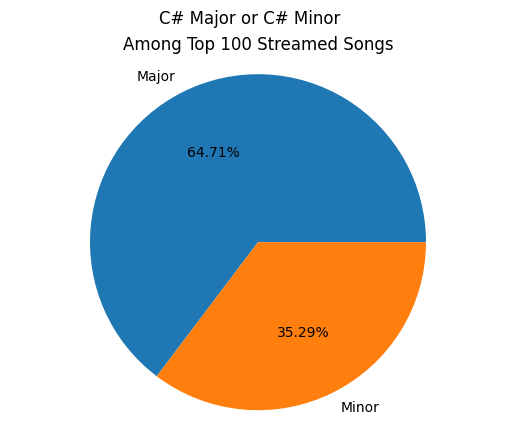

In [36]:
plt.pie(mode_C(100).values, labels=mode_C(100).index, autopct='%1.2f%%')
plt.suptitle('C# Major or C# Minor')
plt.title('Among Top 100 Streamed Songs')
plt.axis('equal')
plt.show()

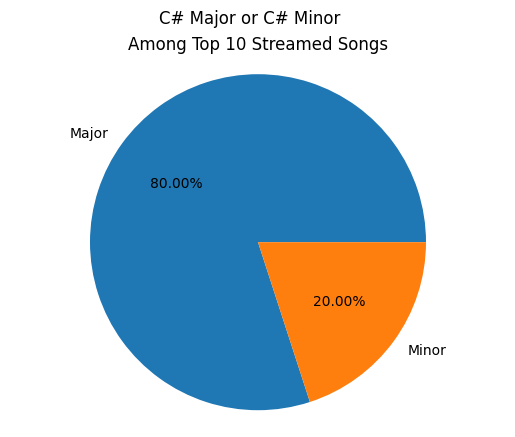

In [37]:
plt.pie(mode_C(10).values, labels=mode_C(10).index, autopct='%1.2f%%')
plt.suptitle('C# Major or C# Minor')
plt.title('Among Top 10 Streamed Songs')
plt.axis('equal')
plt.show()

C# major accounts for the majority of songs in the C# key

Looks likes Squidward should've played Solitude in *C# Major* instead of E Minor

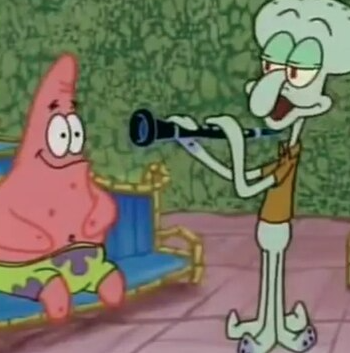

### Release Year

Taking a glance at which years songs at the top of Spotify were released in

In [38]:
song_year = df['released_year'].value_counts()
song_year.head(-1)

released_year
2022    401
2023    175
2021    119
2020     37
2019     36
2017     23
2016     18
2014     13
2013     13
2015     11
2018     10
2012     10
2011     10
2010      7
2002      6
1999      5
1984      4
2000      4
2004      4
1963      3
1958      3
1995      2
1959      2
1985      2
1957      2
1986      2
2003      2
1991      2
2008      2
1975      2
1982      2
1946      1
2005      1
1942      1
1996      1
1998      1
1950      1
1979      1
2007      1
1952      1
1971      1
1970      1
1994      1
1930      1
1973      1
1997      1
1968      1
1992      1
1983      1
Name: count, dtype: int64

There's a lot of years in the before the 2000's with only 3 or less songs, so I'm just going to graph songs that have come out since 2000

In [39]:
year_filter = df[df['released_year']>=2000]
song_year = year_filter['released_year'].value_counts()
#df = df[df['A'] >= 0] 

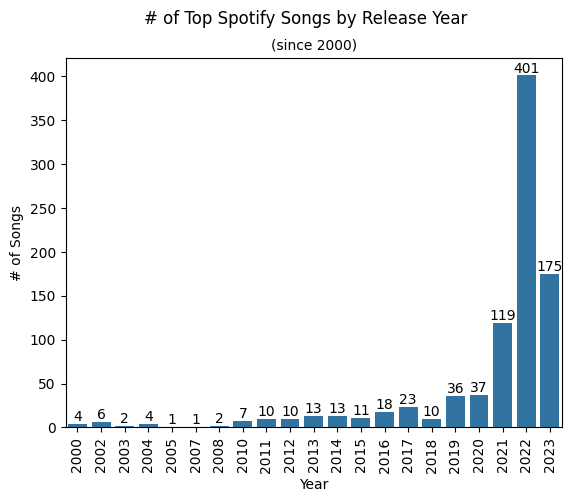

In [40]:
year_plot = sns.barplot(x=song_year.index, y=song_year.values)
for bars in year_plot.containers:
    year_plot.bar_label(bars, fmt='{:,.0f}')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.ylabel('# of Songs')
plt.suptitle('# of Top Spotify Songs by Release Year')
plt.title('(since 2000)', fontsize=10)
plt.show()

The vast majority of songs topping the charts in 2023 were actually released in 2022.

## Song Qualities

There are some interesting metrics in this data:
- danceability (how suitable for dancing)
- valence (positivity)
- energy (perceived energy level)
- acousticness (amount of acoustic sound)
- instrumentalness (amount of instrumental content)
- liveness (presnece of live performance elements)
- speechiness (amoung of spoken words in the song)

I'm going to take these measurements at face value for the sake of analysis, but I understand that these types of measurements are difficult to quantify in this manner.

Let's see if any of these song qualities has any indication for a song's popularity


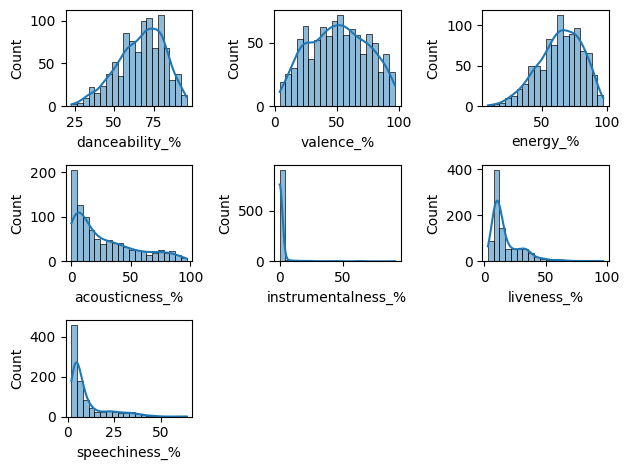

In [42]:
quality_columns = ['danceability_%', 'valence_%', 'energy_%', 'acousticness_%', 'instrumentalness_%', 'liveness_%', 'speechiness_%']
#Originally I made 7 separate histograms for this... and then I found out I could just use a for loop and consolidate all the graphs onto one display
for i, column in enumerate(quality_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data=df, x=column, bins=20, kde=True)
plt.tight_layout()

- Looks like we want a danceable song with high energy
- For valence levels it looks like have a somewhat positive song, but it's mainly bunched up around the 50% levels (what's a 50% positive song?)
- Acoustic elements are generally less popular, but I see this type of thing as more of an artistic style choice
- We absolutely DON'T want acoustic, live, and speechy elements

- These all make sense when we think about what goes into a typical pop song

BPM:

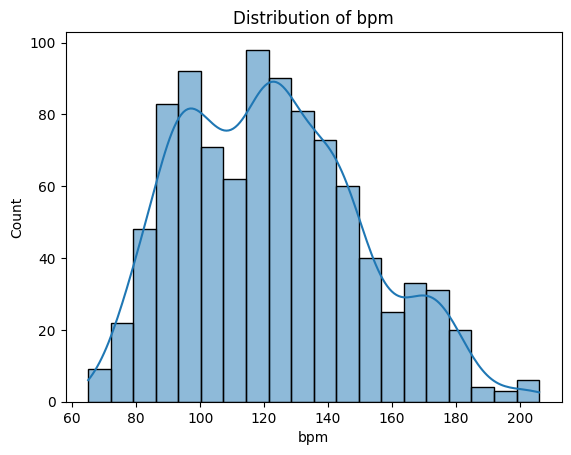

In [67]:
df_bpm = df[['track_name', 'streams', 'bpm']].sort_values(by='streams', ascending=False)
sns.histplot(data=df_bpm, x='bpm', bins=20, kde=True)
plt.title('Distribution of bpm')
plt.show()

Most songs tend to be around 90 or 130 bpm

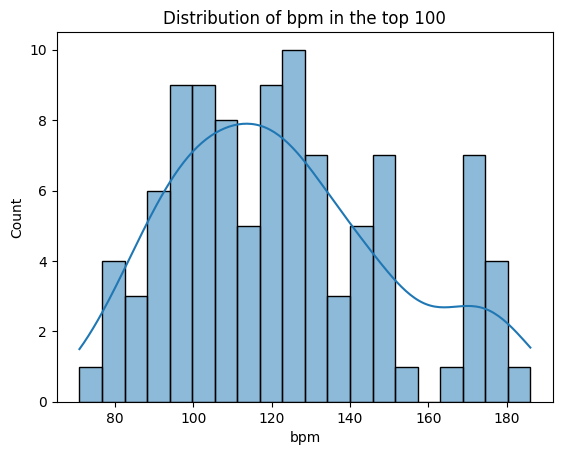

In [68]:
sns.histplot(data=df_bpm.head(100), x='bpm', bins=20, kde=True)
plt.title('Distribution of bpm in the top 100')
plt.show()

Most songs in the top 100 tend to hover around the 90-100 and 130 bpm ranges, very similar to the dataset as a whole

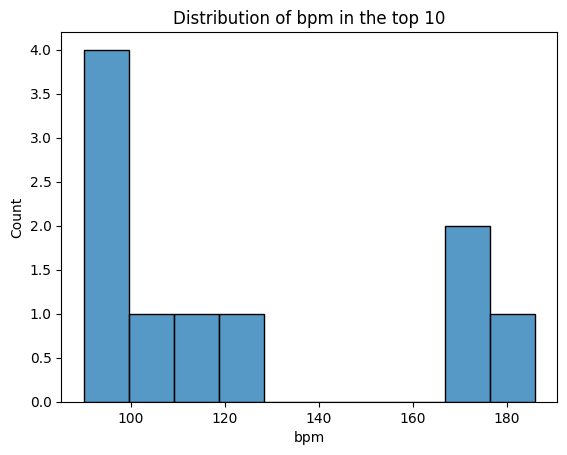

In [66]:
sns.histplot(data=df_bpm.head(10), x='bpm', bins=10)
plt.title('Distribution of bpm in the top 10')
plt.show()

Amongst the top 10, most songs are in the high 90 to 100 bpm range. However, I would also like to note that for the songs in the higher bpm range of 170-180, this is essentially interchangeable to the 90 range, as 90 is just half time of 180. 

It looks like overall, having a song around 90-100 bpm is the most common for a popular song on Spotify

## Final Takeaways



For a mainstream song to perform well, we want:
- dancebaility
- energy
- ~90-100 bpm
- C# major key